In [1]:
from torch_SPO_updated import *
from ICON import *
import time,datetime
import pandas as pd
import logging

In [2]:
import sys
#sys.path.insert(0,'../../EnergyCost/')
sys.path.insert(0,"../")
from get_energy import get_energy

In [3]:
(X_1gtrain, y_train, X_1gtest, y_test) = get_energy("../prices2013.dat")
X_1gvalidation = X_1gtest[0:2880,:]
y_validation = y_test[0:2880]

y_test= y_test[2880:]
X_1gtest = X_1gtest[2880:,:]

../get_energy.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X1g = df.loc[:, df.columns != 'SMPEP2'].as_matrix()
../get_energy.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = df.loc[:, 'SMPEP2'].as_matrix()


In [4]:
file = "load1/day01.txt"
#filename = "../Results/Load1_SPO_warmstart.csv"
param_data = data_reading(file)
h= {"lr":1e-5,"momentum":0.01}
w= {'reset':True,'presolve':False,'warmstart':False}

In [20]:
clf  =  Gurobi_ICON(**param_data,reset=True,presolve = True,verbose=True)
clf.make_model()
clf.solve_model(y_train[0:48])

Presolve removed 49 rows and 1124 columns
Presolve time: 0.04s
Parameter Method unchanged
   Value: -1  Min: -1  Max: 5  Default: -1
Optimize a model with 125 rows, 316 columns and 4661 nonzeros
Variable types: 0 continuous, 316 integer (316 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [3e+04, 5e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+03]
Found heuristic solution: objective 1990227.8029
Presolve time: 0.01s
Presolved: 125 rows, 316 columns, 4661 nonzeros
Variable types: 0 continuous, 316 integer (316 binary)

Root relaxation: objective 1.819322e+06, 20 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1819322.36    0    8 1990227.80 1819322.36  8.59%     -    0s
H    0     0                    1819322.3591 1819322.36  0.00%     -    0s

Explored 1 nodes (20 simplex iterations) in 

(array([   0.   ,  234.255,  234.255,  234.255,  936.48 , 1082.505,
        1082.505, 1082.505, 1295.72 , 1295.72 , 1295.72 , 1195.39 ,
         961.135,  961.135,  611.92 ,  611.92 ,  611.92 ,  359.24 ,
         359.24 ,  359.24 ,  359.24 ,  359.24 ,  553.76 ,  553.76 ,
         553.76 ,  553.76 ,  553.76 ,  553.76 ,  605.955,  978.29 ,
         978.29 ,  765.075,  765.075,  765.075,  765.075,  619.05 ,
         619.05 ,  619.05 ,  619.05 ,  619.05 ,  619.05 ,  619.05 ,
         619.05 ,  619.05 ,  619.05 ,  619.05 ,  619.05 ,  372.335]),
 0.02234482765197754)

In [21]:
clf  =  Gurobi_ICON(**param_data,reset=True,presolve = False,verbose=True)
clf.make_model()
clf.solve_model(y_train[0:48])

Parameter Method unchanged
   Value: -1  Min: -1  Max: 5  Default: -1
Optimize a model with 174 rows, 1440 columns and 21795 nonzeros
Variable types: 0 continuous, 1440 integer (1440 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [3e+04, 5e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+03]
Found heuristic solution: objective 2013863.8214
Presolve removed 46 rows and 1093 columns
Presolve time: 0.04s
Presolved: 128 rows, 347 columns, 5072 nonzeros
Found heuristic solution: objective 1832537.8289
Variable types: 0 continuous, 347 integer (347 binary)

Root relaxation: objective 1.818020e+06, 19 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1818019.90    0    4 1832537.83 1818019.90  0.79%     -    0s
H    0     0                    1818019.9012 1818019.90  0.00%     -    0s

Explored 1 n

(array([   0.   ,    0.   ,    0.   ,  234.255,  936.48 , 1082.505,
        1082.505, 1082.505, 1295.72 , 1295.72 , 1295.72 , 1195.39 ,
        1195.39 , 1195.39 ,  611.92 ,  611.92 ,  611.92 ,  359.24 ,
         359.24 ,  359.24 ,  359.24 ,  359.24 ,  553.76 ,  553.76 ,
         553.76 ,  553.76 ,  553.76 ,  553.76 ,  605.955,  978.29 ,
         978.29 ,  765.075,  765.075,  765.075,  765.075,  619.05 ,
         619.05 ,  619.05 ,  619.05 ,  619.05 ,  619.05 ,  619.05 ,
         619.05 ,  619.05 ,  619.05 ,  619.05 ,  619.05 ,  372.335]),
 0.0608830451965332)

In [5]:
clf = SGD_SPO_generic(solver= Gurobi_ICON,accuracy_measure=False,relax=True, 
                      validation_relax= True,verbose=True,param= param_data, maximize= False,epochs= 4,
                      **w,**h)

pdf1 = clf.fit(X_1gtrain,y_train,X_1gvalidation,y_validation,X_1gtest,y_test)

Academic license - for non-commercial use only
Epoch 0::subepoch 50 Total time 7, validation time 2 & test time 2 validation regret:22153.19
Epoch 0::subepoch 50 Total time 10, validation time 2 & test time 5 test regret:13590.68
Epoch 0::subepoch 100 Total time 13, validation time 3 & test time 5 validation regret:19430.15
Epoch 0::subepoch 100 Total time 16, validation time 3 & test time 8 test regret:13590.68
Epoch 0::subepoch 150 Total time 19, validation time 4 & test time 8 validation regret:19430.15
Epoch 0::subepoch 150 Total time 22, validation time 4 & test time 11 test regret:13590.68
Epoch 0::subepoch 200 Total time 25, validation time 5 & test time 11 validation regret:19430.15
Epoch 0::subepoch 200 Total time 28, validation time 5 & test time 14 test regret:13240.19
Epoch 0::subepoch 250 Total time 31, validation time 6 & test time 14 validation regret:18215.74
Epoch 0::subepoch 250 Total time 34, validation time 6 & test time 17 test regret:13240.19
Epoch 0::subepoch 300

Epoch 3::subepoch 2156 Total time 250, validation time 54 & test time 139 test regret:12711.76
Epoch 3::subepoch 2206 Total time 253, validation time 55 & test time 139 validation regret:18465.34
Epoch 3::subepoch 2206 Total time 256, validation time 55 & test time 143 test regret:13590.68


In [7]:
pdf

,validation_loss,validation_regret_full,test_loss,test_regret_full,subepoch,Runtime,time
0,4414.097168,20973.099711,5310.969727,15110.773272,50,0.686574,10.502975
1,4609.564453,20178.662004,5298.647461,14239.519096,100,1.176322,16.446479
2,4765.990723,20178.662004,5325.604492,13590.682124,150,1.673143,22.442160
3,4824.970703,20178.662004,5334.393555,13788.398153,200,2.181381,28.583581
4,4884.453125,19180.558457,5352.242676,13788.398153,250,2.689616,34.734646
5,4903.921387,19180.558457,5352.682129,13788.398153,300,3.210569,41.119423
6,4857.816406,19180.558457,5334.329590,13788.398153,350,3.761051,47.813282
7,4883.270508,18215.743353,5350.537109,13788.398153,400,4.308864,54.385649
8,4936.479492,17969.705955,5362.059570,13788.398153,450,4.856058,61.088103
9,4925.255859,18215.743353,5359.545410,13788.398153,500,5.395883,67.787064


In [6]:
w= {'reset':True,'presolve':True,'warmstart':False}
clf = SGD_SPO_generic(solver= Gurobi_ICON,accuracy_measure=False,relax=True, 
                      validation_relax= True,verbose=True,param= param_data, maximize= False,epochs= 4,
                      **w,**h)

pdf2 = clf.fit(X_1gtrain,y_train,X_1gvalidation,y_validation,X_1gtest,y_test)

Epoch 0::subepoch 50 Total time 5, validation time 1 & test time 3 validation regret:22153.19
Epoch 0::subepoch 50 Total time 8, validation time 1 & test time 6 test regret:13590.68
Epoch 0::subepoch 100 Total time 9, validation time 1 & test time 6 validation regret:19430.15
Epoch 0::subepoch 100 Total time 13, validation time 1 & test time 9 test regret:13590.68
Epoch 0::subepoch 150 Total time 16, validation time 2 & test time 9 validation regret:19430.15
Epoch 0::subepoch 150 Total time 20, validation time 2 & test time 13 test regret:13590.68
Epoch 0::subepoch 200 Total time 21, validation time 3 & test time 13 validation regret:19430.15
Epoch 0::subepoch 200 Total time 25, validation time 3 & test time 17 test regret:13240.19
Epoch 0::subepoch 250 Total time 26, validation time 3 & test time 17 validation regret:18215.74
Epoch 0::subepoch 250 Total time 30, validation time 3 & test time 20 test regret:13240.19
Epoch 0::subepoch 300 Total time 31, validation time 4 & test time 20 

Epoch 3::subepoch 2206 Total time 207, validation time 28 & test time 147 validation regret:18465.34
Epoch 3::subepoch 2206 Total time 210, validation time 28 & test time 150 test regret:12711.76


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})

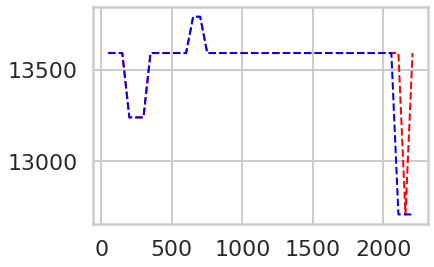

In [10]:
plt.plot(pdf1.subepoch, pdf1.test_regret_full, 'r--',pdf2.subepoch, pdf2.test_regret_full, 'b--')
plt.show()